In [93]:
import numpy as np
import random 
import heapq 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [28]:
# Data
x_data = np.genfromtxt("data/x.csv", delimiter=",")
y_data = np.genfromtxt("data/y.csv", delimiter=",")

xy_data = np.stack([x_data, y_data], axis=2)

# Delete any column that has no ship in the working area at any time slot
xy_data = np.delete(xy_data, np.unique(np.where(~xy_data.any(axis=0))[0]), axis=1)

# number of ships in the working area in time [0, T]
n = xy_data.shape[1]

# Number of time slots in time [0, T]
m = xy_data.shape[0]

In [35]:
first = np.full(n, m, dtype=np.int)  # First slot when ship i is in the work area
last = np.full(n, 0, dtype=np.int)  # Lasst slot when ship i is in the work area

# For loop to fill out first, and last array
for s in range(n):
    c = np.all(xy_data[:, s] != 0, axis=1)
    non_zero = np.where(c)[0]
    if len(non_zero):
        first[s] = non_zero[0]
        last[s] = non_zero[-1] + 1

In [33]:
class Node:
    def __init__(self, ID, times, coords, parent=None):
        """
        Class representing a vertex in the graph
        :param ID : Unique ID of this vertex
        :param index : Index of vertex edges in adjacency matrix
        """
        self.id = ID
        self.parent = None        
        self.visited = False
        self.times = times
        self.coords = coords
        self.f = 0
        self.g = 0
        self.h = 0


In [61]:
def visualize_ships(node, seperate=False):
    if not seperate: 
        fig, ax = plt.subplots()
        
    for n in node: 
        x = n.coords[:, 0]
        y = n.coords[:, 1]
        pid = np.arange(*n.times)
        if seperate:
            fig, ax = plt.subplots()
        ax.plot(x, y, ls="", marker="o")
        for xi, yi, pidi in zip(x, y, pid):
            ax.annotate(str(pidi), xy=(xi, yi))
        if seperate:
            plt.show()
    if not seperate:
        plt.show()

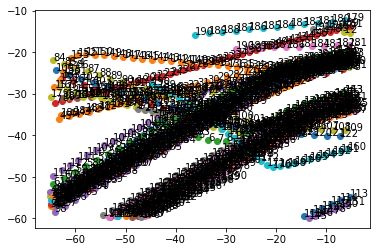

In [90]:
data = {}

for ship in range(xy_data.shape[1]):
    times = (first[ship], last[ship])
    path = xy_data[first[ship] : last[ship], ship, ]
    data[ship] = Node(ID=ship, times=times, coords=path)
visualize_ships([v for k, v in data.items()])

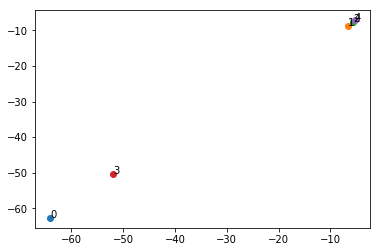

In [86]:
seq = [3, 24, 31, 6, 10]
x_seq = [data[s].coords[0, 0] for s in seq]
y_seq = [data[s].coords[1, 0] for s in seq] 
t_seq = [data[s].times[0] for s in seq]

for order, val in enumerate(zip(x_seq, y_seq, t_seq)):
    xi, yi, pidi = val
    plt.plot(xi, yi, ls="", marker="o")
    plt.annotate(str(order), xy=(xi, yi))
plt.show()

In [100]:
import heapq
def a_star(seq, data):
    
    start = seq[0]
    end = seq[-1]
    
    op = []
    closed = set()
    
    # put the start node on the open list and leave its f value at 0 
    op.append(start)
    heapq.heapify(op)
    
    # Last node in the sequence of ships
    end_node = data[end]
    while op: 
        current = data[heapq.heappop(op)]
        closed.add(current)
        
        if current.ID  == end: 
            path = []
            distance = 0
            c = current 
            while c: 
                p = c.parent
                path.append(c.ID)
                distance.append(math.sqrt((c.coords[0] ** 2 - p.coords[0] ** 2)
                                        + (c.coords[1] ** 2 - p.coords[1] ** 2)))
                c = p
            return path[::-1]
        
        else: 
            
            # In a sequence the next moves are only the next ship
            children = seq.pop(0)
            
            for child in children: 
                if child in closed: 
                    continue
                else: 
                    child_node = data[child]
                    
                    child_node.g = current.g + 1
                    child_node.h = abs(child_node.coords[0] - end_node.coords[0]) 
                    + abs(child_node.coords[1] - end_node.coords[1])
                    child_node.f = child_node.g + child_node.f
                    
                    if child in op: 
                        if op and child_node.g > op[0].g:
                            continue
                        else: 
                            child_node.parent = current
                            heapq.heappush(op, child)

                            

In [101]:
a_star(seq, data)

AttributeError: 'Node' object has no attribute 'ID'